To test if my prediction making pipline would work, I'm going to test it out in this notebook. 

There steps towards predicting are as follows:

1. import a lengthy string of sentences as text data
2. import TFIDF, NMF, and 4 models
3. Use spacy and regex to preprocess
4. Vectorize the string with tfidf.transform()
5. Topic model using NMF.transform()
6. 


In [1]:
import pandas as pd

In [2]:

text_examples = pd.read_pickle('text_examples.pkl')

In [39]:
text = 'hi my name is Brian Brain Brian yayy ayyy yayy'

# Import models and transformations

In [40]:
import pandas as pd
EI = pd.read_pickle('pickled_models/EI_Logistic Reg.pkl')
NS = pd.read_pickle('pickled_models/NS_Logistic Reg.pkl')
FT = pd.read_pickle('pickled_models/FT_Logistic Reg.pkl')
PJ = pd.read_pickle('pickled_models/PJ_Logistic Reg.pkl')

In [41]:
tfidf = pd.read_pickle('pickled_transformations/tfidf.pkl')
TopicModel = pd.read_pickle('pickled_transformations/NMF.pkl')

# SpaCy and Regex preprocessing

In [42]:
import spacy
import re
import string
import matplotlib.pyplot as plt
# Create our list of punctuation marks
punctuations = string.punctuation

# Load English tokenizer, tagger, parser, NER and word vectors
parser = spacy.load('en_core_web_sm')

# Create our list of stopwords
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)
    
    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    
    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]
    
    # return preprocessed list of tokens
    return ' '.join(mytokens)
alphanumeric = lambda x: re.sub('\w*\d\w*', '', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x.lower())

In [43]:
new_text = pd.Series(text).apply(spacy_tokenizer).map(alphanumeric).map(punc_lower)

# TF-IDF text

In [44]:
X_test_tfidf = tfidf.transform(pd.Series(new_text))

In [45]:
pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf.get_feature_names())

,abandon,ability,able,abnormal,abortion,abroad,absence,absent,absolute,absolutely,...,youtube,yr,yrs,yup,zelda,zen,zero,zodiac,zombie,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Topic Modeling

In [46]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    """
    Takes in model and feature names and outputs 
    a list of string of the top words from each topic.
    """
    topics = []
    for ix, topic in enumerate(model.components_):
        topics.append(str(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]])))
    return topics

In [47]:
topics = display_topics(TopicModel, tfidf.get_feature_names(), 15)

In [48]:
topic_word = pd.DataFrame(TopicModel.components_.round(3),
             index =  topics,
             columns = tfidf.get_feature_names())

In [49]:
X_test_topic_array = TopicModel.transform(pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf.get_feature_names()))

In [50]:
X_test_topics = pd.DataFrame(X_test_topic_array.round(5),
             columns = topics)

In [51]:
X_test_topics

,"people, know, talk, want, hate, person, thing, care, ask, usually, tell, try, lot, stupid, understand","fe, ni, fi, ne, ti, te, function, se, si, dom, inferior, user, dominant, cognitive, use","feel, thing, feeling, time, want, like, life, way, know, emotion, hurt, wish, need, understand, relate","welcome, forum, hello, perc, hope, enjoy, hi, fellow, hey, stay, join, site, happy, nice, glad","estp, esfp, estj, estps, type, think, character, se, guess, know, guy, pretty, entj, typing, likely","tapatalk, send, iphone, use, sm, gt, ipad, nexus, think, want, talk, like, cheap, hey, nice","relationship, date, guy, woman, boyfriend, year, girl, man, ex, want, month, sex, meet, male, tell","fuck, shit, man, yeah, fucking, good, want, know, sex, woman, girl, kill, hell, god, right","infj, infjs, ni, fe, dear, male, people, intuition, mother, life, test, soul, type, experience, think","sx, sp, enneagram, tritype, instinct, type, wing, stacking, fix, instinctual, core, description, dom, variant, subtype",...,"isfj, si, isfjs, definitely, mom, dad, like, brother, type, wife, sister, time, relate, usually, think","entj, entjs, estj, think, te, nt, type, estjs, point, approach, strong, dear, waste, control, guy","istj, istjs, estj, niss, husband, type, dad, like, sj, mother, relationship, wife, father, marry, esfp","school, high, year, class, college, grade, teacher, math, mom, parent, test, student, english, major, old","work, job, good, time, thing, like, life, need, career, money, want, pay, learn, help, start","post, thread, forum, read, point, question, come, thing, page, op, topic, actually, answer, ask, comment","esfj, estj, esfp, mother, esfjs, sister, mom, girlfriend, father, mbti, fe, type, good, know, inferior","thank, hi, know, reply, help, response, guy, hello, sorry, appreciate, try, question, advice, input, yes","haha, yeah, hahaha, oh, pretty, definitely, actually, agree, guess, people, yes, hmm, sure, kinda, sort","music, song, listen, play, band, album, pretty, guitar, metal, classical, rock, lyric, genre, favorite, piano"
0,0.0,0.0,0.0,0.01453,0.0,0.0,0.0,0.0,0.00032,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.09063,0.0,0.0


In [52]:
pred_list = []
if EI.predict(X_test_topics) == 1:
    pred_list.append('E')
else:
    pred_list.append('I')
if NS.predict(X_test_topics) == 1:
    pred_list.append('N')
else:
    pred_list.append('S')
if FT.predict(X_test_topics) == 1:
    pred_list.append('F')
else:
    pred_list.append('T')
if PJ.predict(X_test_topics) == 1:
    pred_list.append('P')
else:
    pred_list.append('J')
prediction = ''.join(pred_list)

In [53]:
prediction 

'INTP'

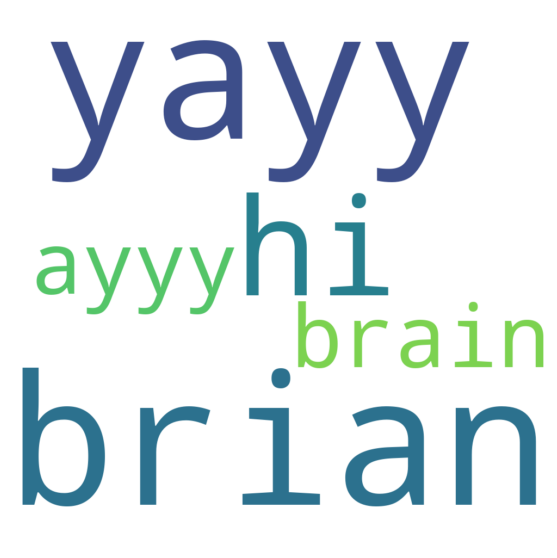

In [57]:
# Generate WordCloud
from wordcloud import WordCloud 

# Generate a word cloud image
wordcloud = WordCloud(width = 1000, height = 1000,
                background_color ='white',
                min_font_size = 20).generate(new_text[0])

# Display the generated image:
# the matplotlib way:
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Appendix

Writing styles. 

In [97]:
text = pd.DataFrame([text])

In [98]:
pd.Series(text_examples[0])

0    What has been the most life-changing experienc...
dtype: object

In [33]:
pd.Series(text)

0    What has been the most life-changing experienc...
dtype: object

In [35]:
text1 = 'I am Brian'